# Hello World

In this tutorial I'll be following along a simple demonstration of setting up a **quantum program**, and running it on a **quantum processing unit (QPU)**. You have to start somewhere, and the best place is usually from the beginning. 

Along this tutorial in which we will be creating a simple Bell state circuit, the quantum version of Hello World!

But I'll be adding an additional layer of commentary, and making it my own, to help turn this tutorial into something that a mere mortal might be able to understand. If one comes away from this understanding 10% of what is going on, one is doing very well. Better than me...

Of course, I skipped over the introductions course. The best learning is done through doing! Working with your hands, rather than pondering in the skies. 

Ref: https://quantum.cloud.ibm.com/docs/en/tutorials/hello-world

#### On a side note

You may be thinking, what is the point? Why not just follow along with the tutorial and do it. Well for two reasons, #1 the referenced tutorial makes no sense to an actual human, #2 it is very easy to just mindlessly copy and execute code, and feel that satisfaction of doing. But to actually understand what's happening, and the underlying calculations. That's a whole another pursuit. I'm not saying I even come close to be successful here. But maybe one day.

### What is a Bell state circuit?

A Bell state circuit is made up of two gates, the Hadamard gate and a CNOT gate, more on this laters. The combination of these two circuits allow you to investigate the Bell states. Essentially, the 4 states that are created when two qubits are entangled. 

*these are also known as EPR states*

The four bell states:
|β₀₀⟩ = (|00⟩ + |11⟩) / √2
|β₀₁⟩ = (|01⟩ + |10⟩) / √2
|β₁₀⟩ = (|00⟩ - |11⟩) / √2
|β₁₁⟩ = (|01⟩ - |10⟩) / √2

#### What this actually means

The end states are denoted as |β₀₀⟩, |β₀₁⟩, |β₁₀⟩, |β₁₁⟩, also known as  Φ⁺, Φ⁻, Ψ⁺, Ψ⁻

- |00⟩ = both qubits in state 0
- |01⟩ = first qubit in state 0, second qubit in state 1  
- |10⟩ = first qubit in state 1, second qubit in state 0
- |11⟩ = both qubits in state 1

*In dirac notion, the first number in the brackets is the first qubit, the second the second. 

#### The mathematics

1. You start with the initial state of |00⟩

2. Application of the Hadamard gate put it into a superposition of |0⟩ and |1⟩: (|00⟩ + |10⟩)/√2 

3. CNOT gate then flips the second qubit, depending on the first: (|00⟩ + |11⟩)/√2 = |β₀₀⟩. We can see that in the first |00 becayse the first qubit is 0, the second doesnt flip, but then in the second because the first is 1, the second is now 1. 

4. The main point is that because the second qubit depends on the superposition of the first, this means the two qubits are entangled. If this doesn't immediately make sense, neither. But let's proceed forth in ignorance for now. Some understanding just takes time. 



## Step 1. Crafting Quantum Instructions

Quantum Circuits are the human, visual interface that we craft a set of intructions that a Quantum Computer can action. We will be using the Qiskit SDK here. I'll try to explain the code as we go along

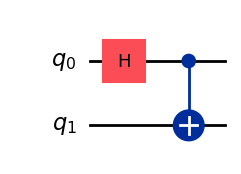

In [1]:
from qiskit import *


# Create a Quantum Circuit with 2 qubits using qiskit
qc = QuantumCircuit(2)

# Apply Hadamard gate to the first qubit
qc.h(0) 

# Apply CNOT gate with control qubit 0 and target qubit 1
qc.cx(0, 1)


qc.draw(output="mpl")


## Step 2. Setting up the output

In the world of Qiskit, you can return data in two fashions, a probability distribution across a set of qubits, or the expectation value of an observable. 

### Probability Distribution
Shows frequency of each state e.g. frquency of measuring 00, 01, 10, 11

### Expectation Values
"Gives yuo quantum mechanical averages"...yeah I can't think of a good way to explain this, so maybe I'll try to show you.

As, in this example, we measure expectation values.

To do this, we need to create 6 two-qubit Pauli Operators: IZ, IX, ZI, XI, ZZ, XX. 

### What are these you ask?

Well before we start with the two, we should probably start with the single qubit pauli matrices

The Four Pauli Matrices

#### I (Identity Matrix)
I = (1  0)
    (0  1)

Effect: Does nothing - leaves the qubit unchanged
Physical meaning: No operation applied
On |0⟩: I|0⟩ = |0⟩
On |1⟩: I|1⟩ = |1⟩

#### X (Pauli-X / NOT Gate)
X = (0  1)
    (1  0)
Effect: Flips the qubit state (bit flip)
Physical meaning: Rotation around X-axis of Bloch sphere
On |0⟩: X|0⟩ = |1⟩
On |1⟩: X|1⟩ = |0⟩

#### Y (Pauli-Y)

Y = (0  -i)
    (i   0)

Effect: Combines bit flip and phase flip
Physical meaning: Rotation around Y-axis of Bloch sphere
On |0⟩: Y|0⟩ = i|1⟩
On |1⟩: Y|1⟩ = -i|0⟩

#### Z (Pauli-Z / Phase Flip)
Effect: Flips the phase (leaves |0⟩ unchanged, adds minus sign to |1⟩)
Physical meaning: Rotation around Z-axis of Bloch sphere
On |0⟩: Z|0⟩ = |0⟩
On |1⟩: Z|1⟩ = -|1⟩



### TLDR

So long story short, the way I like to think of it (perhaps wrongly) is the these operators represent the change to the qubits value that we might expect. The expectation value of an operator is the average outcome that you would obtain 

So I represents no change before and after the quantum circuit, Y is a flip in the Y axis, and Z is a rotation in the Z axis. 

## Back to two-bit Pauli Operators

In [2]:
# We use SparsePauliOp from the quantum_info to define observables
from qiskit.quantum_info import SparsePauliOp


observables = [
    SparsePauliOp("IZ"),  # Measures qubit 1 in Z basis
    SparsePauliOp("ZI"),  # Measures qubit 0 in Z basis  
    SparsePauliOp("ZZ"),  # Measures correlation between both qubits in Z basis
    SparsePauliOp("XX"),  # Measures correlation in X basis
    SparsePauliOp("YY"),  # Measures correlation in Y basis
]

# Let's see what these mean mathematically
for obs in observables:
    print(f"{obs}: Matrix shape {obs.to_matrix().shape}")
    print(f"Matrix:\n{obs.to_matrix()}\n")


SparsePauliOp(['IZ'],
              coeffs=[1.+0.j]): Matrix shape (4, 4)
Matrix:
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]

SparsePauliOp(['ZI'],
              coeffs=[1.+0.j]): Matrix shape (4, 4)
Matrix:
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]

SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j]): Matrix shape (4, 4)
Matrix:
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]

SparsePauliOp(['XX'],
              coeffs=[1.+0.j]): Matrix shape (4, 4)
Matrix:
[[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]

SparsePauliOp(['YY'],
              coeffs=[1.+0.j]): Matrix shape (4, 4)
Matrix:
[[ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]
 [ 


### 🧮 Basis States and Vectors

| State | Vector |
|-------|--------|
| |00⟩ | [1, 0, 0, 0]ᵀ |
| |01⟩ | [0, 1, 0, 0]ᵀ |
| |10⟩ | [0, 0, 1, 0]ᵀ |
| |11⟩ | [0, 0, 0, 1]ᵀ |

### 🧪 Example: Apply Matrix M SparsePauliOp(['IZ'], to |01⟩

Let's multiply matrix SparsePauliOp(['IZ'], by the vector for |01⟩:

$$
M =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1
\end{bmatrix}
,\quad
|01⟩ =
\begin{bmatrix}
0 \\
1 \\
0 \\
0
\end{bmatrix}
$$

$$
M \cdot |01⟩ =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1
\end{bmatrix}
\cdot
\begin{bmatrix}
0 \\
1 \\
0 \\
0
\end{bmatrix}
=
\begin{bmatrix}
0 \\
-1 \\
0 \\
0
\end{bmatrix}
= -1 \cdot |01⟩
$$

✅ **Result**: The state remains |01⟩, but acquires a global phase of **−1**.

### Moving on

So we have set up the observables. But there are a couple of things that we need to do:

1. We need to confirm our intrsuctions to the backend devices Instruction Set Architecture

I'm going to be doing this on a live machine. 

#### What the hell is the Instruction Set Architecture (ISA)?



In [21]:
from qiskit_ibm_runtime import QiskitRuntimeService
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Get credentials from environment variables
token = os.getenv('IBM_QUANTUM_TOKEN')
instance = os.getenv('IBM_QUANTUM_INSTANCE')

if token is None:
    raise ValueError("Please set IBM_QUANTUM_TOKEN in your .env file")

# Save and create the service
QiskitRuntimeService.save_account(
    token=token,
    instance=instance,
    overwrite=True
)

service = QiskitRuntimeService()
print("Successfully connected to IBM Quantum!")
print(service.backends)

Successfully connected to IBM Quantum!
<bound method QiskitRuntimeService.backends of <QiskitRuntimeService>>


In [22]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Find the least busy backend that is not a simulator and is operational
backend = service.least_busy(simulator=False, operational=True)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
#1 = equalling light optimisation

transpiled_qc = pm.run(qc)

print(backend)

<IBMBackend('ibm_torino')>


In [24]:
for backend in service.backends():
    print(backend.name)
    print(backend.num_qubits)


status = backend.status()
print(f"Backend Status: {status.status_msg}")
print(f"Pending Jobs: {status.pending_jobs}")

ibm_brisbane
127
ibm_torino
133
Backend Status: active
Pending Jobs: 558


### What is this Pass Maanger?

So this Pass Manager is essentially the pipeline of transforms that are required to convert your abstract (idealised) quantum circuit into something that can actually be run by the limited quantum hardware.

Due to hardware limitations such as:
- Limited connectivity: Not all qubits can directly interact
- Native gate set: Hardware only supports specific gates (not necessarily H and CNOT)
- Noise and errors: Some sequences are more robust than others

We are required to:
1.  adapt our circuit to the hardware's constraints
2. Optimise the circuit for better performance
3. Map our virtual qubits to the physical qubits on the device

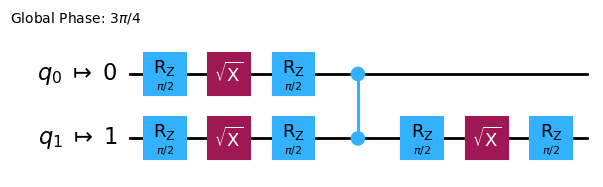

In [12]:

transpiled_qc.draw(output="mpl", idle_wires=False)


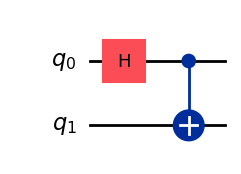

In [ ]:
qc.draw(output="mpl")

### Now if we compare all the gates

In [ ]:
# Check the gate counts
print(f"\nOriginal gates: {qc.count_ops()}")
print(f"Transpiled gates: {transpiled_qc.count_ops()}")


Original gates: OrderedDict([('h', 1), ('cx', 1)])
Transpiled gates: OrderedDict([('rz', 6), ('sx', 3), ('cz', 1)])


#### New Gates now include

##### rz - Z-Rotation Gate
What it does: Rotates qubit around the Z-axis of the Bloch sphere.

Why is it used:


##### sx - Square-root-of-X Gate
What it does: Performs a π/2 rotation around the X-axis — halfway between identity and a full bit-flip.

Why is it used: Building block for creating the Hadamard gate. H ≈ RZ(π) · SX · RZ(π)

##### cz - Controlled-Z Gate (1 instance)
What it does: Flips the sign of |11⟩ → −|11⟩.

Why is it used:  Introduces entanglement when combined with Hadamard. H ⋅ CZ ⋅ H = CNOT



This is why transpilation is crucial - it bridges the gap between what's easy for humans to understand and what the quantum hardware can actually execute!

### Executing the circuit and measuring observables

To do this we need primitives! We need to run the circuit multiple times due to random results. Therefore, probability reveals the true answer. In QiSkit there are two primitives: <ZZ> = 0.85

1. The Estimator - gives you the expectation value of observables => A single number representing the quantum mechanical averages e.g. 

2. The Sampler - used to return a probability distributions

Since we set up the observables earlier, let's start with The Estimator!



In [13]:
from qiskit_ibm_runtime import Estimator
# We begin by setting up the estimator primitive

estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000

# mapping your observables to match the physical qubits that your transpiled circuit is using.
mapped_observables = [observable.apply_layout(transpiled_qc.layout) for observable in observables]


#### A quick note on the observable

In [14]:
# Example of what happens internally:
original_obs = SparsePauliOp("ZI")  # [Z on qubit 0, I on qubit 1]
layout = transpiled_qc.layout.initial_layout  # {0: 5, 1: 7} (example)

mapped_obs = original_obs.apply_layout(layout)
# Result: SparsePauliOp with Z on physical qubit 5, I on physical qubit 7

TypeError: '<' not supported between instances of 'qiskit.circuit.Qubit' and 'int'

### Running the job


In [16]:
job = estimator.run([(transpiled_qc, mapped_observables)])
job_id = job.job_id
print(f"Save this Job ID: {job_id}")

result = job.result()

Save this Job ID: <bound method BasePrimitiveJob.job_id of <RuntimeJobV2('d3ca23elahfs73cutn1g', 'estimator')>>


KeyboardInterrupt: 

In [28]:
job = service.job("d3ca23elahfs73cutn1g")  # Retrieve by ID
if job.done():
    result = job.result()
else:
    print(f"Job still running. Status: {job.status()}")
    print(job.queue_info().position)




Job still running. Status: QUEUED


AttributeError: 'RuntimeJobV2' object has no attribute 'queue_info'

### Plotting the result

In [ ]:
from matplotlib import pyplot as plt

pub_result = job.result()[0]

values = pub_result.data.evs

errors = pub_result.data.stds

observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]

# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()



### The Sampler

This requires a few considerations:


In [ ]:
from qiskit_ibm_runtime import Sampler
from qiskit import ClassicalRegister
import matplotlib.pyplot as plt

# Create a copy of the transpiled circuit for measurement
measured_qc = transpiled_qc.copy()

# Add classical register to store measurement results
measured_qc.add_register(ClassicalRegister(2, 'c'))

# Add measurements to all qubits
measured_qc.measure_all()

print("Circuit with measurements:")
print(measured_qc.draw())

# Set up the sampler primitive
sampler = Sampler(mode=backend)
sampler.options.default_shots = 5000

# Run the sampling job
job = sampler.run([measured_qc])
result = job.result()

# Get the measurement counts
pub_result = result[0]
counts = pub_result.data.c.get_counts()

print(f"\nMeasurement counts: {counts}")

# Calculate probabilities
total_shots = sum(counts.values())
probabilities = {state: count/total_shots for state, count in counts.items()}

print(f"Probabilities: {probabilities}")

# Plot the results
states = list(counts.keys())
count_values = list(counts.values())

plt.figure(figsize=(10, 6))

# Bar plot of counts
plt.subplot(1, 2, 1)
plt.bar(states, count_values)
plt.xlabel('Quantum States')
plt.ylabel('Measurement Counts')
plt.title(f'Bell State Measurements\n(Total shots: {total_shots})')

# Bar plot of probabilities
plt.subplot(1, 2, 2)
prob_values = list(probabilities.values())
plt.bar(states, prob_values)
plt.xlabel('Quantum States')
plt.ylabel('Probability')
plt.title('Bell State Probabilities')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Analyze the Bell state
print("\n=== Bell State Analysis ===")
print(f"Expected for perfect Bell state |β₀₀⟩ = (|00⟩ + |11⟩)/√2:")
print("- |00⟩: ~50%")
print("- |11⟩: ~50%")
print("- |01⟩ and |10⟩: ~0%")
print(f"\nActual results:")
for state, prob in probabilities.items():
    print(f"- |{state}⟩: {prob:.1%}")

# Calculate entanglement fidelity
expected_states = ['00', '11']
measured_fidelity = sum(probabilities.get(state, 0) for state in expected_states)
print(f"\nBell state fidelity: {measured_fidelity:.1%}")